In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.dummy import DummyClassifier
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
#intervening fit
i_c = pd.read_csv("busyfit_intervening.txt", sep='\t')
#intervening fit without nan or inf or -inf
i_c_2 = i_c.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

#getting all the file names which have nan or inf or -inf
all_i = i_c.merge(i_c_2.drop_duplicates(), on = ['Filename'], how='left', indicator=True)
intervening_non_fit = all_i[all_i['_merge'] == 'left_only']
# for i in intervening_non_fit['Filename'].tolist():
#     print(i)

#associated fit
a_c = pd.read_csv("busyfit_associated_corrected.txt", sep='\t')
#associated fit without nan or inf or -inf
a_c_2 = a_c.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

all_a = a_c.merge(a_c_2.drop_duplicates(), on = ['Filename'], how='left', indicator=True)
associated_non_fit_c = all_a[all_a['_merge'] == 'left_only']
# for i in associated_non_fit_c['Filename'].tolist():
#     print(i)

#adding coloumn int or ass to all fits
i_c_2['Class'] = '1'
a_c_2['Class'] = '0'

i_c_2.reset_index(drop=True, inplace=True)
a_c_2.reset_index(drop=True, inplace=True)

tot_fit = pd.concat([a_c_2, i_c_2])
tot_fit

,Filename,Success,Nchan,dof,chi^2,chi^2/dof,rms,A,dA,B_1,...,dX,W_50,dW_50,W_20,dW_20,F_peak,dF_peak,F_int,dF_int,Class
0,0003+380_ak18.DAT,0,42,37,6.310980e+06,170567.000000,0.01,3.794890e+01,2.029680e+01,0.156570,...,0.000000e+00,0.0000,0.000000e+00,0.0000,0.000000e+00,29.896900,5.351460e-03,0.000000,0.000000e+00,0
1,0035+22_omd+17.DAT,0,57,49,1.092020e+00,0.022286,0.01,4.570920e-03,8.113850e-01,3.539630,...,4.894520e+04,168.5370,2.494620e+05,183.4300,8.668590e+04,0.012289,3.137770e-01,1.455610,7.048980e+02,0
2,0941-08_omd+17.DAT,2,63,58,9.084350e+01,1.566270,0.01,4.636150e-02,5.130390e-03,0.376950,...,3.748890e+17,273.1180,9.999680e+17,319.8790,9.051050e+17,0.046361,5.979700e+04,12.679100,3.345540e+16,0
3,101301.DAT,0,154,149,3.230620e+06,21682.000000,0.01,4.579690e+00,1.953440e-01,5.701480,...,1.160430e+09,674.3710,1.528690e+09,702.0690,1.320860e+09,4.579690,1.326630e-03,3088.790000,1.071930e+10,0
4,1045+35A_adi.DAT,1,157,152,1.209680e+07,79583.900000,0.01,1.723550e+03,1.765720e+04,0.006886,...,0.000000e+00,0.0000,0.000000e+00,0.0000,0.000000e+00,16.346800,2.894770e-03,0.000000,0.000000e+00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,SPEC_J1438d.DAT,0,505,500,1.412480e+01,0.028250,0.01,1.323280e-02,1.296320e-02,0.237052,...,3.900340e+00,18.4012,9.840200e+00,25.9958,1.052260e+01,0.012522,5.776920e-03,0.235370,8.686460e-02,1
44,SPEC_J1443.DAT,1,512,507,5.611800e+00,0.011069,0.01,9.546120e+08,2.517170e+12,0.082519,...,1.533250e+00,8.8789,7.662810e+00,14.0158,9.310070e+01,0.046497,1.050480e-01,0.454052,6.177870e-01,1
45,SPEC_J1551.DAT,0,511,503,8.732810e+00,0.017361,0.01,1.016100e-01,1.258670e+13,3.246860,...,1.441940e+12,72.9568,2.141280e+15,122.4800,4.839690e+15,0.066411,5.235680e+11,0.800432,3.985470e+11,1
46,SPEC_J1639.DAT,0,512,504,1.803290e+02,0.357795,0.01,1.124310e-01,3.582340e-01,0.126561,...,4.944160e-01,23.8519,1.165040e+00,32.6225,1.316030e+00,0.077859,4.274530e-03,1.868390,6.815180e-02,1


In [5]:
tot_fit.columns

Index(['Filename', 'Success', 'Nchan', 'dof', 'chi^2', 'chi^2/dof', 'rms', 'A',
       'dA', 'B_1', 'dB_1', 'B_2', 'dB_2', 'C', 'dC', 'XE_0', 'dXE_0', 'XP_0',
       'dXP_0', 'W', 'dW', 'N', 'dN', 'X', 'dX', 'W_50', 'dW_50', 'W_20',
       'dW_20', 'F_peak', 'dF_peak', 'F_int', 'dF_int', 'Class'],
      dtype='object')

In [4]:
# input
X = tot_fit.iloc[:, [7, 9, 11, 13, 15, 17, 21, 29, 31]].values #excluding 19, 23, 25, 27 columns
# output
y = tot_fit.iloc[:, 33].values.astype('int')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=100, random_state=0)

In [5]:
# checking the scores for zero rule model

score_list = ['roc_auc', 'accuracy', 'average_precision']

steps_dummy = [('over', SMOTE(sampling_strategy=1, random_state=0)), ('model', DummyClassifier(strategy='prior'))]
pipeline_dummy = Pipeline(steps=steps_dummy)
for i in score_list:
    print('{} for SMOTE Model is {}'.format(i, round(np.mean(cross_val_score(pipeline_dummy, X, y, scoring=i, cv=cv, n_jobs=-1)), 3)))

roc_auc for SMOTE Model is 0.5
accuracy for SMOTE Model is 0.619
average_precision for SMOTE Model is 0.381


# Random Forest

In [6]:
steps_rf = [('over', SMOTE(sampling_strategy=1, random_state=0)), ('model', RandomForestClassifier(n_estimators=7, max_depth=2, max_features='sqrt', min_samples_leaf=3, min_samples_split=2, random_state=0))]
pipeline_rf = Pipeline(steps=steps_rf)
for i in score_list:
    print('{} for SMOTE Model is {}'.format(i, round(np.mean(cross_val_score(pipeline_rf, X, y, scoring=i, cv=cv, n_jobs=-1)), 3)))

roc_auc for SMOTE Model is 0.914
accuracy for SMOTE Model is 0.795
average_precision for SMOTE Model is 0.884


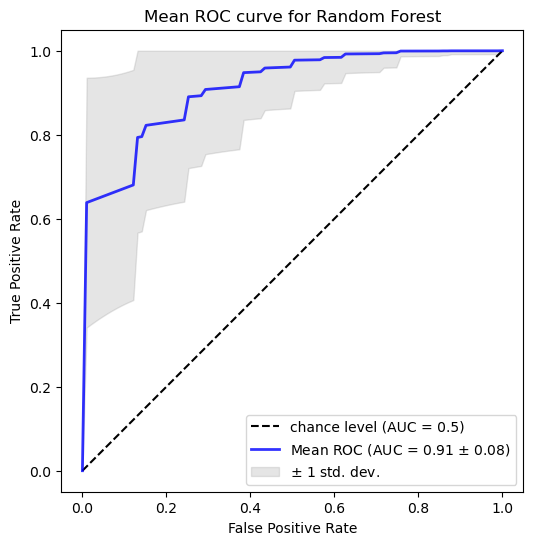

In [6]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

classifier = pipeline_rf

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    y_prob = classifier.predict_proba(X[test])[:,1]
    fpr, tpr, _ = roc_curve(y[test], y_prob)
    roc_auc = auc(fpr, tpr)
    # viz = RocCurveDisplay.from_estimator(
    #     classifier,
    #     X[test],
    #     y[test],
    #     #name=f"ROC fold {fold}",
    #     alpha=0.3,
    #     lw=1,
    #     ax=ax,
    # )
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)
ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC curve for Random Forest",
)
ax.axis("square")
ax.legend(loc="lower right")

plt.gcf()
handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[:]
labels = labels[:]
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.savefig('./figures_corrected/ROC_curve_random_forest_not_redshift.png')
plt.show()

# XG Boost

In [7]:
steps_xg = [('over', SMOTE(sampling_strategy=1, random_state=0)), ('model', XGBClassifier(subsample=1.0, reg_lambda=0, reg_alpha=1, learning_rate=0.5, gamma=0.3, colsample_bytree=1.0 , n_estimators=9, max_depth=3, random_state=0))]
pipeline_xg = Pipeline(steps=steps_xg)
for i in score_list:
    print('{} for SMOTE Model is {}'.format(i, round(np.mean(cross_val_score(pipeline_xg, X, y, scoring=i, cv=cv, n_jobs=-1)), 3)))

roc_auc for SMOTE Model is 0.96
accuracy for SMOTE Model is 0.891
average_precision for SMOTE Model is 0.95


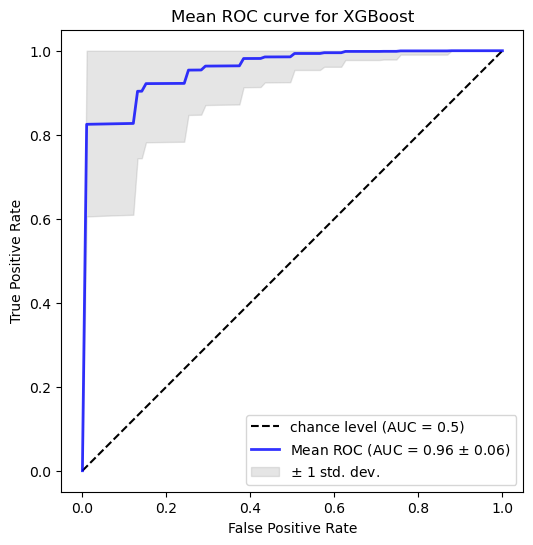

In [8]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

classifier = pipeline_xg

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    y_prob = classifier.predict_proba(X[test])[:,1]
    fpr, tpr, _ = roc_curve(y[test], y_prob)
    roc_auc = auc(fpr, tpr)
    # viz = RocCurveDisplay.from_estimator(
    #     classifier,
    #     X[test],
    #     y[test],
    #     #name=f"ROC fold {fold}",
    #     alpha=0.3,
    #     lw=1,
    #     ax=ax,
    # )
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)
ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC curve for XGBoost",
)
ax.axis("square")
ax.legend(loc="lower right")

plt.gcf()
handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[:]
labels = labels[:]
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.savefig('./figures_corrected/ROC_curve_XGBoost_not_redshift.png')
plt.show()

# Decision Tree

In [8]:
steps_dt = [('over', SMOTE(sampling_strategy=1, random_state=0)), ('model', DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=2 , random_state=0))]
pipeline_dt = Pipeline(steps=steps_dt)
for i in score_list:
    print('{} for DT SMOTE Model is {}'.format(i, round(np.mean(cross_val_score(pipeline_dt, X, y, scoring=i, cv=cv, n_jobs=-1)),3)))

roc_auc for DT SMOTE Model is 0.884
accuracy for DT SMOTE Model is 0.838
average_precision for DT SMOTE Model is 0.813


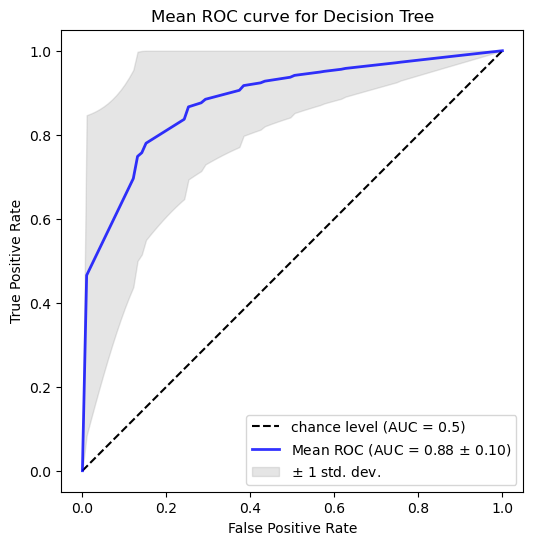

In [10]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

classifier = pipeline_dt

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    y_prob = classifier.predict_proba(X[test])[:,1]
    fpr, tpr, _ = roc_curve(y[test], y_prob)
    roc_auc = auc(fpr, tpr)
    # viz = RocCurveDisplay.from_estimator(
    #     classifier,
    #     X[test],
    #     y[test],
    #     #name=f"ROC fold {fold}",
    #     alpha=0.3,
    #     lw=1,
    #     ax=ax,
    # )
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)
ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC curve for Decision Tree",
)
ax.axis("square")
ax.legend(loc="lower right")

plt.gcf()
handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[:]
labels = labels[:]
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.savefig('./figures_corrected/ROC_curve_decision_tree_not_redshift.png')
plt.show()

# KNN

In [9]:
steps_knn = [('scaler', StandardScaler()), ('over', SMOTE(sampling_strategy=1, random_state=0)), ('model', KNeighborsClassifier(n_neighbors=13, algorithm='auto', n_jobs=-1, p=1, weights='distance'))]
pipeline_knn = Pipeline(steps=steps_knn)
for i in score_list:
    print('{} for KNN SMOTE Model is {}'.format(i, round(np.mean(cross_val_score(pipeline_knn, X, y, scoring=i, cv=cv, n_jobs=-1)),3)))

roc_auc for KNN SMOTE Model is 0.799
accuracy for KNN SMOTE Model is 0.75
average_precision for KNN SMOTE Model is 0.762


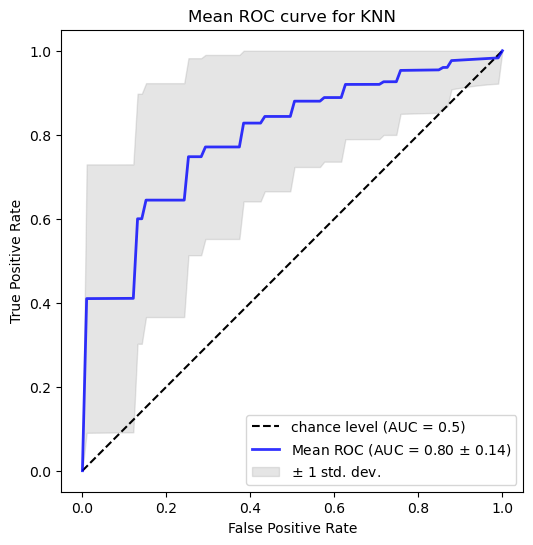

In [12]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

classifier = pipeline_knn

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    y_prob = classifier.predict_proba(X[test])[:,1]
    fpr, tpr, _ = roc_curve(y[test], y_prob)
    roc_auc = auc(fpr, tpr)
    # viz = RocCurveDisplay.from_estimator(
    #     classifier,
    #     X[test],
    #     y[test],
    #     #name=f"ROC fold {fold}",
    #     alpha=0.3,
    #     lw=1,
    #     ax=ax,
    # )
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)
ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC curve for KNN",
)
ax.axis("square")
ax.legend(loc="lower right")

plt.gcf()
handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[:]
labels = labels[:]
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.savefig('./figures_corrected/ROC_curve_KNN_not_redshift.png')
plt.show()

# SVM

In [10]:
steps_svm = [('scaler', StandardScaler()), ('over', SMOTE(sampling_strategy=1, random_state=0)), ('model', SVC(C = 1, kernel='poly', coef0=0, degree=2, gamma=1, random_state=0, probability=True))]
pipeline_svm = Pipeline(steps=steps_svm)
for i in score_list:
    print('{} for SVM SMOTE Model is {}'.format(i, round(np.mean(cross_val_score(pipeline_svm, X, y, scoring=i, cv=cv, n_jobs=-1)),3)))

roc_auc for SVM SMOTE Model is 0.792
accuracy for SVM SMOTE Model is 0.733
average_precision for SVM SMOTE Model is 0.765


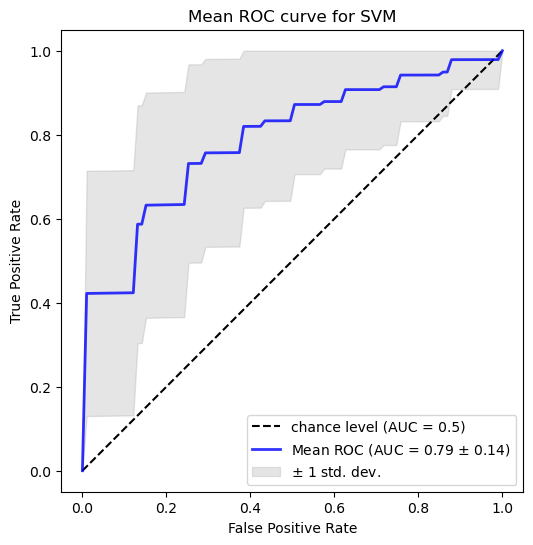

In [14]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

classifier = pipeline_svm

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    y_prob = classifier.predict_proba(X[test])[:,1]
    fpr, tpr, _ = roc_curve(y[test], y_prob)
    roc_auc = auc(fpr, tpr)
    # viz = RocCurveDisplay.from_estimator(
    #     classifier,
    #     X[test],
    #     y[test],
    #     #name=f"ROC fold {fold}",
    #     alpha=0.3,
    #     lw=1,
    #     ax=ax,
    # )
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)
ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC curve for SVM",
)
ax.axis("square")
ax.legend(loc="lower right")

plt.gcf()
handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[:]
labels = labels[:]
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.savefig('./figures_corrected/ROC_curve_SVM_not_redshift.png')
plt.show()

# Logistic Regression

In [11]:
steps_lr = [('scaler', StandardScaler()), ('over', SMOTE(sampling_strategy=1, random_state=0)), ('model', LogisticRegressionCV(max_iter=300, Cs= 100, penalty='l2', random_state=0, solver='liblinear', n_jobs=-1))]
pipeline_lr = Pipeline(steps=steps_lr)
for i in score_list:
    print('{} for LR SMOTE Model is {}'.format(i, round(np.mean(cross_val_score(pipeline_lr, X, y, scoring=i, cv=cv, n_jobs=-1)),3)))

roc_auc for LR SMOTE Model is 0.528
accuracy for LR SMOTE Model is 0.469
average_precision for LR SMOTE Model is 0.56


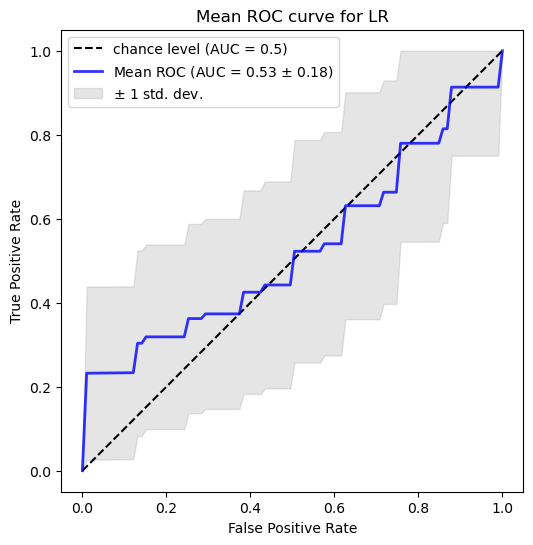

In [20]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

classifier = pipeline_lr

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    y_prob = classifier.predict_proba(X[test])[:,1]
    fpr, tpr, _ = roc_curve(y[test], y_prob)
    roc_auc = auc(fpr, tpr)
    # viz = RocCurveDisplay.from_estimator(
    #     classifier,
    #     X[test],
    #     y[test],
    #     #name=f"ROC fold {fold}",
    #     alpha=0.3,
    #     lw=1,
    #     ax=ax,
    # )
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)
ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC curve for LR",
)
ax.axis("square")
ax.legend(loc="lower right")

plt.gcf()
handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[:]
labels = labels[:]
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.savefig('./figures_corrected/ROC_curve_LR_not_redshift.png')
plt.show()

# Ensemble

In [12]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators=[('XG Boost', pipeline_xg),
                                        ('Random Forest', pipeline_rf),
                                        ('Decision Tree', pipeline_dt),
                                        ('KNN', pipeline_knn),
                                        ('SVM', pipeline_svm),
                                        ('Logistic Regression', pipeline_lr)],
                             voting='soft', n_jobs=-1)

for i in score_list:
    print('{} for SVM SMOTE Model is {}'.format(i, round(np.mean(cross_val_score(ensemble, X, y, scoring=i, cv=cv, n_jobs=-1)),3)))

roc_auc for SVM SMOTE Model is 0.951
accuracy for SVM SMOTE Model is 0.875
average_precision for SVM SMOTE Model is 0.936


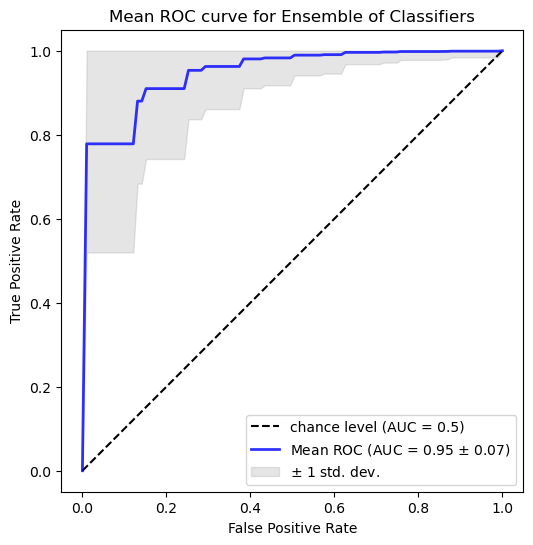

In [13]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

classifier = ensemble

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    y_prob = classifier.predict_proba(X[test])[:,1]
    fpr, tpr, _ = roc_curve(y[test], y_prob)
    roc_auc = auc(fpr, tpr)
    # viz = RocCurveDisplay.from_estimator(
    #     classifier,
    #     X[test],
    #     y[test],
    #     #name=f"ROC fold {fold}",
    #     alpha=0.3,
    #     lw=1,
    #     ax=ax,
    # )
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)
ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC curve for Ensemble of Classifiers",
)
ax.axis("square")
ax.legend(loc="lower right")

plt.gcf()
handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[:]
labels = labels[:]
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.savefig('./figures_corrected/ensemble_not_redshift.png')
plt.show()

# All model accuracy in a plot

In [21]:
def mse_array(x):
    return np.mean((x - np.mean(x)) ** 2, dtype=float)

In [22]:
model1_scores = mse_array(cross_val_score(pipeline_rf, X, y, scoring='accuracy', cv=cv, n_jobs=-1))
model2_scores = mse_array(cross_val_score(pipeline_dt, X, y, scoring='accuracy', cv=cv, n_jobs=-1))
model3_scores = mse_array(cross_val_score(pipeline_svm, X, y, scoring='accuracy', cv=cv, n_jobs=-1))
model4_scores = mse_array(cross_val_score(pipeline_xg, X, y, scoring='accuracy', cv=cv, n_jobs=-1))
model5_scores = mse_array(cross_val_score(pipeline_knn, X, y, scoring='accuracy', cv=cv, n_jobs=-1))
model6_scores = mse_array(cross_val_score(pipeline_lr, X, y, scoring='accuracy', cv=cv, n_jobs=-1))

print(model1_scores, model2_scores, model3_scores, model4_scores, model5_scores, model6_scores)

0.011883011793228138 0.01118234714003945 0.01490641021531887 0.008422991288625906 0.01429558366206443 0.01858398668639053


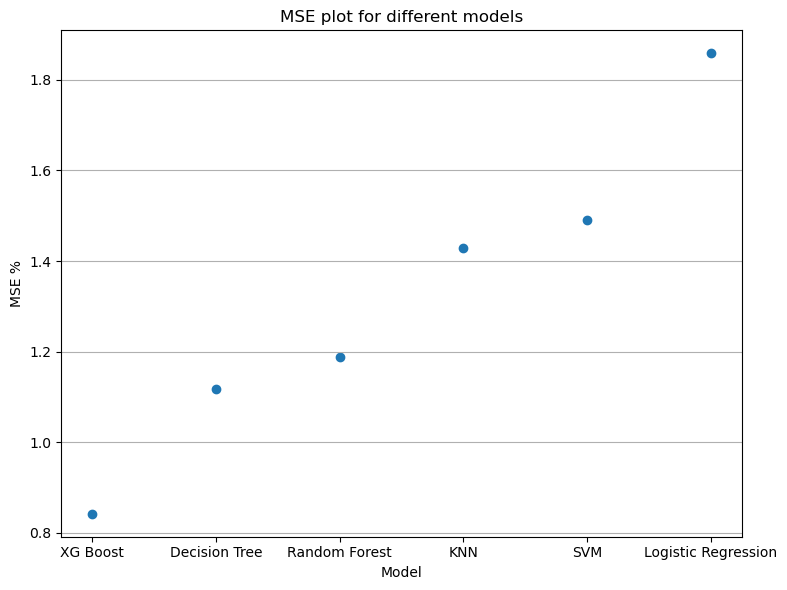

In [23]:
class_labels = ['XG Boost', 'Decision Tree', 'Random Forest', 'KNN', 'SVM', 'Logistic Regression']
all_scores = [model4_scores*100, model2_scores*100, model1_scores*100, model5_scores*100, model3_scores*100, model6_scores*100]

# Create histogram plot
fig, ax = plt.subplots(figsize=(8, 6))


ax.scatter(class_labels, all_scores, alpha=1)

ax.set_xlabel('Model')
ax.set_ylabel('MSE %')
ax.set_title('MSE plot for different models')

ax.yaxis.grid(True)

fig.tight_layout()

plt.savefig('./figures_corrected/mse_plot_fig_all_machine_learning_models_not_redshift.png')
plt.show()